# Multivariable Linear Regression

In [1]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# datasets 
from sklearn.datasets import load_boston

%matplotlib inline

### Typical Data related questions

1. What is the source? Where does it come from?
2. Do I already have a description of what is in the data?
3. How many indivisual data points? 
4. How many features are in the dataset?
5. What are the names of the features?
6. What is the descropton of the features?


### Get the data

In [2]:
boston = load_boston()

In [3]:
# get some general info about the data 
print("BOSTON DATASET")
print("______________")
print('The dataset has a type of :', type(boston))
print('The type of the data is   :', type(boston.data))
print('The shape of the data is  :', boston.data.shape)
      

BOSTON DATASET
______________
The dataset has a type of : <class 'sklearn.utils.Bunch'>
The type of the data is   : <class 'numpy.ndarray'>
The shape of the data is  : (506, 13)


In [4]:
# convert to a dataframe 
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)

# add a column with the price 
data['PRICE'] = boston.target

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Cleaning our data (simple null checks)

In [6]:
# check for the nulls in our data 
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [7]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Visualization (stage 1)

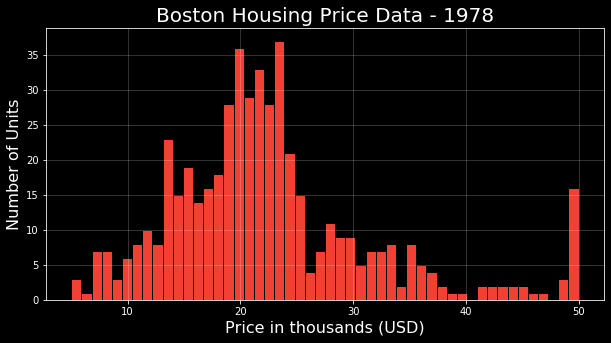

In [8]:
# histogram of the boston housing data 
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
plt.title('Boston Housing Price Data - 1978', fontsize=20)
plt.xlabel('Price in thousands (USD)', fontsize=16)
plt.ylabel('Number of Units', fontsize=16)
plt.grid(color='w', alpha=0.25)
plt.hist(data['PRICE'], bins=50, ec='black', color='#f44335', alpha=0.99);


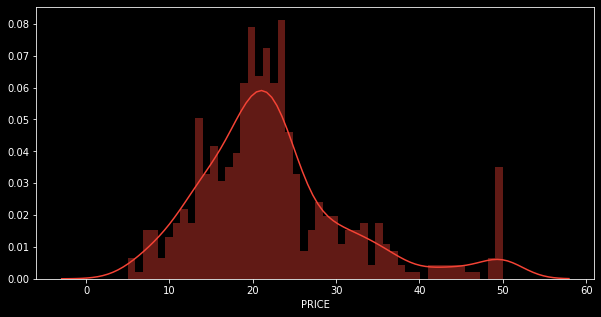

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(data['PRICE'], bins=50, color='#f44335');

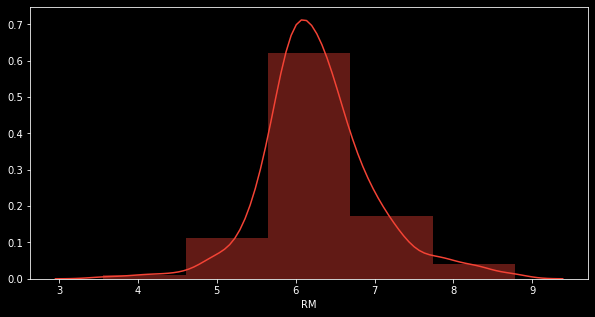

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(data['RM'], bins=5, color='#f44335');

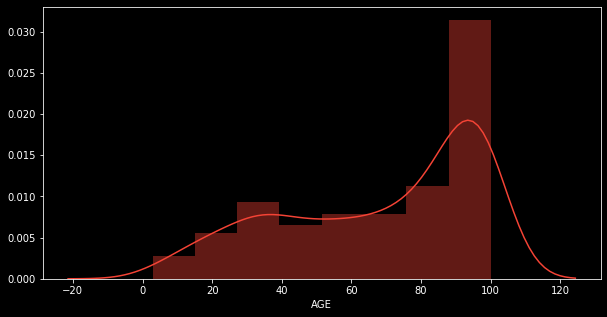

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(data['AGE'],  color='#f44335');

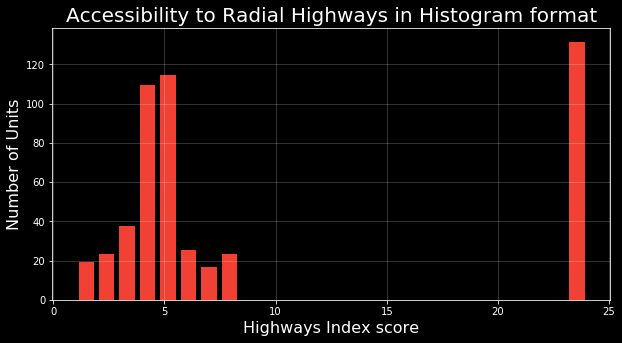

In [12]:
# histogram of the boston housing data for index to highway aceesibility
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
plt.title('Accessibility to Radial Highways in Histogram format', fontsize=20)
plt.xlabel('Highways Index score', fontsize=16)
plt.ylabel('Number of Units', fontsize=16)
plt.grid(color='w', alpha=0.25)
plt.hist(data['RAD'], bins=25, rwidth=0.8, ec='black', color='#f44335', alpha=0.99);

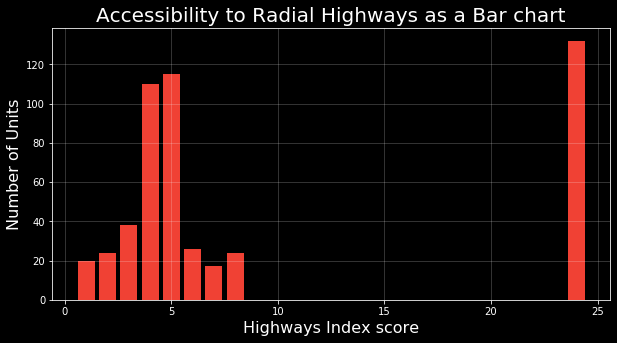

In [13]:
# As a bar chart
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
plt.title('Accessibility to Radial Highways as a Bar chart', fontsize=20)
plt.xlabel('Highways Index score', fontsize=16)
plt.ylabel('Number of Units', fontsize=16)
plt.grid(color='w', alpha=0.25)
plt.bar(data['RAD'].value_counts().index, height=data['RAD'].value_counts(), color='#f44335', alpha=0.99);

In [38]:
# challenge - find the properties tracking ghe river 
river_props = data[data.CHAS == 1.0]
river_props

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,1.0,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4
209,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09,20.0
210,0.17446,0.0,10.59,1.0,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7
